## Task 1: Data Preparation and Customer Analytics

### Background Information:

As a member of Quantium's retail analytics team, you've been tasked with providing insights into the types of customers who purchase chips and their purchasing behavior within the region. Your analysis will inform the supermarket's strategic plan for the chip category in the upcoming months.

### Task:

To present a strategic recommendation to Julia, the Category Manager, supported by data-driven insights, you need to analyze the data to understand current purchasing trends and behaviors. The client is particularly interested in customer segments and their chip purchasing behavior. Consider what metrics would help describe customers' purchasing behavior.

To begin, download the provided CSV data files and perform high-level data checks, such as:

Creating and interpreting high-level summaries of the data.
Identifying and removing outliers (if applicable).
Checking data formats and making corrections (if applicable).
Additionally, derive extra features such as pack size and brand name from the data. Define metrics of interest to enable the drawing of insights on who spends on chips and what drives spending for each customer segment. Ensure that the insights obtained have a commercial application and can contribute to forming a strategy for the chip category.



In [2]:
# load packages
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load data
transaction = pd.read_excel('QVI_transaction_data.xlsx')
customer = pd.read_csv('QVI_purchase_behaviour.csv')

In [4]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


General information about the transaction dataset. The data type of some column are incorrect

#### Convert column "DATE" to datetime data type.

In [6]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'], origin='1899-12-30', unit='D')


In [7]:
transaction.sample(60)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
118941,2019-04-03,15,15124,13507,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,2,3.4
99058,2018-08-20,9,9306,8757,101,Doritos Salsa Medium 300g,1,2.6
225810,2018-10-03,203,203083,202662,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4
80466,2019-04-03,270,270069,267081,15,Twisties Cheese 270g,2,9.2
230601,2018-11-15,53,53404,47694,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0
175602,2019-05-26,72,72128,71144,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6
239899,2019-01-01,19,19208,16480,52,Grain Waves Sour Cream&Chives 210G,2,7.2
31192,2019-06-08,125,125165,128942,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8
255597,2018-12-23,232,232109,235831,26,Pringles Sweet&Spcy BBQ 134g,2,7.4
217504,2019-03-01,5,5109,5000,74,Tostitos Splash Of Lime 175g,2,8.8


In [8]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [9]:
def convert_column_to_string(df, column_name):
    """
    Convert the specified column in the DataFrame to string type.
    
    Args:
        df (pandas.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column to convert to string type.
        
    Returns:
        None
    """
    df[column_name] = df[column_name].astype(str)

In [10]:
transaction = transaction.rename(columns={'STORE_NBR':'Store_number', 'LYLTY_CARD_NBR':'Card_number', 'TXN_ID':'Transaction_id', 
                                          'PROD_NBR':'Product_number', 'PROD_NAME':'Product_name', 'PROD_QTY':'Product_quantity', 'TOT_SALES':'Total_sales'})

In [11]:
transaction.head(5) 

,DATE,Store_number,Card_number,Transaction_id,Product_number,Product_name,Product_quantity,Total_sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [12]:
convert_column_to_string(transaction,'Card_number')
convert_column_to_string(transaction,'Transaction_id')

In [13]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              264836 non-null  datetime64[ns]
 1   Store_number      264836 non-null  int64         
 2   Card_number       264836 non-null  object        
 3   Transaction_id    264836 non-null  object        
 4   Product_number    264836 non-null  int64         
 5   Product_name      264836 non-null  object        
 6   Product_quantity  264836 non-null  int64         
 7   Total_sales       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 16.2+ MB


In [14]:
transaction['Product_name']= transaction['Product_name'].str.strip()

In [15]:
transaction.sample(10)

,DATE,Store_number,Card_number,Transaction_id,Product_number,Product_name,Product_quantity,Total_sales
130412,2018-10-04,194,194167,193960,51,Doritos Mexicana 170g,2,8.8
14938,2019-04-04,225,225086,225177,36,Kettle Chilli 175g,2,10.8
148436,2019-03-08,233,233186,236951,25,Pringles SourCream Onion 134g,2,7.4
54939,2019-03-30,270,270088,267204,67,RRD Chilli& Coconut 150g,2,5.4
134685,2018-11-30,264,264276,263036,85,RRD Honey Soy Chicken 165g,2,6.0
16513,2019-06-24,261,261091,260110,51,Doritos Mexicana 170g,2,8.8
163461,2019-06-05,164,164256,165369,26,Pringles Sweet&Spcy BBQ 134g,2,7.4
89120,2019-01-03,118,118038,120895,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6
67210,2019-01-16,223,223232,224328,110,WW Original Corn Chips 200g,2,3.8
86427,2019-02-13,79,79314,78078,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2


#### Extract pack size.

In [16]:
transaction['weight(g)']= transaction['Product_name'].str.extract(r"(\d+)[gG]")

In [17]:
transaction.sample(10)

,DATE,Store_number,Card_number,Transaction_id,Product_number,Product_name,Product_quantity,Total_sales,weight(g)
181524,2019-01-08,201,201242,200994,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110
192887,2019-05-08,106,106198,107948,28,Thins Potato Chips Hot & Spicy 175g,2,6.6,175
44735,2018-09-16,138,138009,140507,98,NCC Sour Cream & Garden Chives 175g,2,6.0,175
22910,2019-06-23,194,194102,193701,74,Tostitos Splash Of Lime 175g,2,8.8,175
35258,2019-03-12,35,35261,31810,95,Sunbites Whlegrn Crisps Frch/Onin 90g,1,1.7,90
116932,2018-07-15,262,262182,262335,103,RRD Steak & Chimuchurri 150g,2,5.4,150
10265,2019-01-01,112,112170,114810,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150
80296,2018-08-10,264,264313,263087,46,Kettle Original 175g,2,10.8,175
124979,2018-12-24,109,109061,110527,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,110
208690,2019-04-24,97,97031,96463,109,Pringles Barbeque 134g,2,7.4,134


In [18]:
transaction['Product_name']= transaction['Product_name'].str.replace(r"(\d+)[gG]","")

/var/folders/fl/pc69thlj5m72n1w073prjtdh0000gn/T/ipykernel_55851/1391986305.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  transaction['Product_name']= transaction['Product_name'].str.replace(r"(\d+)[gG]","")


In [19]:
transaction.sample(10)

,DATE,Store_number,Card_number,Transaction_id,Product_number,Product_name,Product_quantity,Total_sales,weight(g)
54410,2018-08-07,260,260246,259486,90,Tostitos Smoked Chipotle,2,8.8,175
253337,2018-08-25,202,202379,202281,33,Cobs Popd Swt/Chlli &Sr/Cream Chips,2,7.6,110
261857,2018-10-15,141,141080,142303,33,Cobs Popd Swt/Chlli &Sr/Cream Chips,1,3.8,110
71103,2019-03-13,36,36278,33096,33,Cobs Popd Swt/Chlli &Sr/Cream Chips,2,7.6,110
132129,2018-12-06,221,221261,221043,17,Kettle Sensations BBQ&Maple,1,4.6,150
24797,2018-10-10,261,261321,261054,112,Tyrrells Crisps Ched & Chives,2,8.4,165
183273,2018-07-19,232,232189,236262,51,Doritos Mexicana,2,8.8,170
26293,2019-04-06,97,97116,97007,79,Smiths Chip Thinly CutSalt/Vinegr,2,6.0,175
162030,2019-01-22,147,147035,145936,75,Cobs Popd Sea Salt Chips,2,7.6,110
10234,2018-08-26,112,112039,113925,35,Woolworths Mild Salsa,2,3.0,300


#### Check duplicate rows and missing values.

In [20]:
sum(transaction.duplicated())

1

In [21]:
transaction.drop_duplicates(inplace= True)

In [22]:
sum(transaction.duplicated())

0

In [23]:
transaction.isna().sum()

DATE                0
Store_number        0
Card_number         0
Transaction_id      0
Product_number      0
Product_name        0
Product_quantity    0
Total_sales         0
weight(g)           0
dtype: int64

#### Create some new features

In [24]:
# price
transaction['Product_price'] = np.round(transaction['Total_sales'] / transaction['Product_quantity'], 2)  # round to 2 decimal places.
# month, day of week
transaction['Month'] = transaction['DATE'].dt.month
transaction['Dayofweek'] = transaction['DATE'].dt.dayofweek.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

In [25]:
transaction.shape

(264835, 12)

#### Remove the products which are not chips.

In [26]:
# 'Old El Paso' is not a chip brand, remove them, the number of rows reduces from 264835 to 255511, 9324 rows are removed.
remove_index = [idx for idx in transaction.index if 'Old El Paso' in transaction.loc[idx, 'Product_name']]
transaction = transaction.drop(index=remove_index).reset_index(drop=True)
transaction.shape

(255511, 12)

#### There are some non-character symbols, like " " (white space), "&" and "/", in the product names.

In [27]:
non_character = set()
for product_name in transaction['Product_name']:
    non_character.update(set(re.findall(r'[^\w]', product_name)))

non_character = list(non_character)
non_character

['&', ' ', '/']

#### Remove "&", "/" and unnecessary white spaces.

In [28]:
product_names = transaction['Product_name']
product_name_clean = [re.sub(r'([\s&/]+)', ' ', name) for name in product_names]  # replace with a single space
transaction['Product_name'] = product_name_clean

In [29]:
transaction.sample(10)

,DATE,Store_number,Card_number,Transaction_id,Product_number,Product_name,Product_quantity,Total_sales,weight(g),Product_price,Month,Dayofweek
133152,2019-02-23,40,40055,36379,50,Tostitos Lightly Salted,2,8.8,175,4.4,2,Saturday
86520,2019-01-26,123,123209,126933,4,Dorito Corn Chp Supreme,2,13.0,380,6.5,1,Saturday
178576,2019-05-19,99,99303,98284,105,Woolworths Cheese Rings,1,1.8,190,1.8,5,Sunday
43657,2019-04-15,147,147171,146758,74,Tostitos Splash Of Lime,2,8.8,175,4.4,4,Monday
4258,2019-03-29,232,232238,236575,27,WW Supreme Cheese Corn Chips,2,3.8,200,1.9,3,Friday
139163,2019-03-18,160,160005,160214,39,Smiths Crinkle Cut Tomato Salsa,2,5.2,150,2.6,3,Monday
90764,2019-03-05,191,191176,192804,38,Infuzions Mango Chutny Papadums,2,4.8,70,2.4,3,Tuesday
23493,2019-01-26,245,245323,247819,25,Pringles SourCream Onion,2,7.4,134,3.7,1,Saturday
158242,2018-10-15,171,171040,172213,31,Infzns Crn Crnchers Tangy Gcamole,2,7.6,110,3.8,10,Monday
136559,2019-03-11,105,105167,106301,37,Smiths Thinly Swt Chli S Cream,2,6.0,175,3.0,3,Monday


#### Extract brand name

In [30]:
brand_list = ['Burger Rings', 'Cheetos', 'Cheezels', 'Cobs', 'CCs', 'Doritos', 'Dorito', 'French Fries', 'GrnWves', 'Grain Waves', 'Infzns', 'Infuzions', 'Kettle', 'NCC', 'Natural ChipCo',
              'Natural Chip Co', 'Pringles', 'RRD', 'Red Rock Deli', 'Smiths', 'Smith', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties', 'Tyrrells', 'WW','Woolworths']

product_brand, product_flavour = [], []

for product_name in transaction['Product_name']:
    found_brand = False
    for brand in brand_list:
        if re.search(r'\b' + re.escape(brand) + r'\b', product_name):
            product_brand.append(brand)
            product_flavour.append(re.sub(r'\b' + re.escape(brand) + r'\b', '', product_name).strip())
            found_brand = True
            break
    if not found_brand:
        product_brand.append('Natural Chip Co')
        product_flavour.append(product_name.strip())

transaction['Product_brand'] = product_brand
transaction['Product_flavour'] = product_flavour
transaction.head(5)

,DATE,Store_number,Card_number,Transaction_id,Product_number,Product_name,Product_quantity,Total_sales,weight(g),Product_price,Month,Dayofweek,Product_brand,Product_flavour
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,3.00,10,Wednesday,Natural Chip Co,Natural Chip Compny SeaSalt
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,2.10,5,Tuesday,CCs,Nacho Cheese
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,1.45,5,Monday,Smiths,Crinkle Cut Chips Chicken
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,3.00,8,Friday,Smiths,Chip Thinly S Cream Onion
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,4.60,8,Saturday,Kettle,Tortilla ChpsHny Jlpno Chili


In [31]:
transaction['Product_brand'].unique()

array(['Natural Chip Co', 'CCs', 'Smiths', 'Kettle', 'Grain Waves',
       'Doritos', 'Twisties', 'WW', 'Thins', 'Burger Rings', 'NCC',
       'Cheezels', 'Infzns', 'Red Rock Deli', 'Pringles',
       'Natural ChipCo', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French Fries', 'RRD',
       'Tostitos', 'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

#### Correct the inconsistent brand names

In [32]:
brand_mapping = {
    'Dorito': 'Doritos',
    'GrnWves': 'Grain Waves',
    'Infzns': 'Infuzions',
    'Natural ChipCo': 'Natural Chip Co',
    'NCC': 'Natural Chip Co',
    'RRD': 'Red Rock Deli',
    'Smith': 'Smiths',
    'Snbts': 'Sunbites',
    'WW': 'Woolworths'
}

# Use np.select() to apply the mapping
conditions = [transaction['Product_brand'] == old_brand for old_brand in brand_mapping.keys()]
choices = [new_brand for new_brand in brand_mapping.values()]

transaction['Product_brand'] = np.select(conditions, choices, transaction['Product_brand'])

In [33]:
transaction['Product_Name_New'] = transaction['Product_brand'] + ' ' + transaction['Product_flavour'] + ' ' + transaction['weight(g)'].astype('str') + 'g'

In [34]:
transaction.head(5)

,DATE,Store_number,Card_number,Transaction_id,Product_number,Product_name,Product_quantity,Total_sales,weight(g),Product_price,Month,Dayofweek,Product_brand,Product_flavour,Product_Name_New
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,3.00,10,Wednesday,Natural Chip Co,Natural Chip Compny SeaSalt,Natural Chip Co Natural Chip Compny SeaSalt 175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,2.10,5,Tuesday,CCs,Nacho Cheese,CCs Nacho Cheese 175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,1.45,5,Monday,Smiths,Crinkle Cut Chips Chicken,Smiths Crinkle Cut Chips Chicken 170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S Cream Onion,5,15.0,175,3.00,8,Friday,Smiths,Chip Thinly S Cream Onion,Smiths Chip Thinly S Cream Onion 175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny Jlpno Chili,3,13.8,150,4.60,8,Saturday,Kettle,Tortilla ChpsHny Jlpno Chili,Kettle Tortilla ChpsHny Jlpno Chili 150g


#### Some Woolworths products are not chips, remove them. The number of rows reduces from 255511 to 252590, 2921 rows are removed.

In [35]:
non_chip_name = ['Woolworths Medium Salsa 300g','Woolworths Mild Salsa 300g']
transaction = transaction[~transaction['Product_Name_New'].isin(non_chip_name)].reset_index(drop=True)
transaction.shape


(252590, 15)

#### Check outlier points.

There are outlier points in "Product_quantity".

In [36]:
# only one customer
transaction[transaction['Product_quantity']>150]

,DATE,Store_number,Card_number,Transaction_id,Product_number,Product_name,Product_quantity,Total_sales,weight(g),Product_price,Month,Dayofweek,Product_brand,Product_flavour,Product_Name_New
66595,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380,3.25,8,Sunday,Doritos,Corn Chp Supreme,Doritos Corn Chp Supreme 380g
66596,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380,3.25,5,Monday,Doritos,Corn Chp Supreme,Doritos Corn Chp Supreme 380g


There are two transactions purchasing 200 packs of chips each. Also, this customer only had these two transactions. So, we can assume this customer was more likely to be an organization rather than a single person. It is better to remove it from the dataset

In [37]:
# only two transactions
transaction[transaction['Card_number']=='226000']

,DATE,Store_number,Card_number,Transaction_id,Product_number,Product_name,Product_quantity,Total_sales,weight(g),Product_price,Month,Dayofweek,Product_brand,Product_flavour,Product_Name_New
66595,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme,200,650.0,380,3.25,8,Sunday,Doritos,Corn Chp Supreme,Doritos Corn Chp Supreme 380g
66596,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme,200,650.0,380,3.25,5,Monday,Doritos,Corn Chp Supreme,Doritos Corn Chp Supreme 380g


#### Remove this customer. The number of rows reduces from 252590 to 252588.

In [38]:
transaction = transaction[transaction['Product_quantity']<150].reset_index(drop=True)
transaction.shape

(252588, 15)

In [39]:
customer =customer.rename(columns={'LYLTY_CARD_NBR':'Card_number','LIFESTAGE':'life_stage','PREMIUM_CUSTOMER':'customer_category'})

In [40]:
customer.sample(10)

,Card_number,life_stage,customer_category
30505,112089,OLDER FAMILIES,Budget
7128,25378,YOUNG FAMILIES,Premium
17681,65052,YOUNG FAMILIES,Budget
54833,205418,YOUNG SINGLES/COUPLES,Mainstream
62971,237043,YOUNG SINGLES/COUPLES,Mainstream
27204,99142,YOUNG FAMILIES,Mainstream
13251,49101,NEW FAMILIES,Mainstream
69877,261322,YOUNG FAMILIES,Budget
0,1000,YOUNG SINGLES/COUPLES,Premium
3864,15006,YOUNG FAMILIES,Premium


In [41]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Card_number        72637 non-null  int64 
 1   life_stage         72637 non-null  object
 2   customer_category  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [42]:
convert_column_to_string(customer,'Card_number')

In [43]:
customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Card_number        72637 non-null  object
 1   life_stage         72637 non-null  object
 2   customer_category  72637 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [45]:
customer['life_stage'] = customer['life_stage'].str.title()

In [46]:
customer.sample(10)

,Card_number,life_stage,customer_category
45021,169110,Young Families,Mainstream
60433,228131,Young Singles/Couples,Budget
61498,232039,Retirees,Budget
1741,6146,Young Singles/Couples,Premium
36297,134011,Older Families,Budget
32217,119198,Retirees,Budget
47436,177169,Young Families,Mainstream
53555,201145,Older Singles/Couples,Budget
19354,71026,Midage Singles/Couples,Mainstream
48386,181174,Older Families,Mainstream


In [47]:
merged_df = pd.merge(transaction, customer, on='Card_number', how='left')

In [48]:
merged_df.sample(30)

,DATE,Store_number,Card_number,Transaction_id,Product_number,Product_name,Product_quantity,Total_sales,weight(g),Product_price,Month,Dayofweek,Product_brand,Product_flavour,Product_Name_New,life_stage,customer_category
118711,2018-07-05,101,101074,100470,79,Smiths Chip Thinly CutSalt Vinegr,2,6.0,175,3.0,7,Thursday,Smiths,Chip Thinly CutSalt Vinegr,Smiths Chip Thinly CutSalt Vinegr 175g,Older Singles/Couples,Premium
217658,2018-08-22,268,268351,264782,81,Pringles Original Crisps,1,3.7,134,3.7,8,Wednesday,Pringles,Original Crisps,Pringles Original Crisps 134g,Young Families,Premium
149455,2019-04-15,75,75007,73420,32,Kettle Sea Salt And Vinegar,2,10.8,175,5.4,4,Monday,Kettle,Sea Salt And Vinegar,Kettle Sea Salt And Vinegar 175g,Retirees,Mainstream
246393,2019-03-09,270,270114,267381,69,Smiths Chip Thinly S Cream Onion,2,6.0,175,3.0,3,Saturday,Smiths,Chip Thinly S Cream Onion,Smiths Chip Thinly S Cream Onion 175g,Young Singles/Couples,Mainstream
67995,2018-08-28,40,40046,36324,7,Smiths Crinkle Original,2,11.4,330,5.7,8,Tuesday,Smiths,Crinkle Original,Smiths Crinkle Original 330g,Older Families,Premium
79185,2019-05-31,27,27264,24344,87,Infuzions BBQ Rib Prawn Crackers,2,7.6,110,3.8,5,Friday,Infuzions,BBQ Rib Prawn Crackers,Infuzions BBQ Rib Prawn Crackers 110g,Older Singles/Couples,Budget
178046,2018-08-07,23,23043,19004,102,Kettle Mozzarella Basil Pesto,2,10.8,175,5.4,8,Tuesday,Kettle,Mozzarella Basil Pesto,Kettle Mozzarella Basil Pesto 175g,Young Families,Budget
132652,2018-07-19,60,60353,57653,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175,5.4,7,Thursday,Kettle,Sweet Chilli And Sour Cream,Kettle Sweet Chilli And Sour Cream 175g,Retirees,Budget
152899,2019-02-28,118,118223,121949,104,Infuzions Thai SweetChili PotatoMix,2,7.6,110,3.8,2,Thursday,Infuzions,Thai SweetChili PotatoMix,Infuzions Thai SweetChili PotatoMix 110g,Retirees,Mainstream
21939,2018-12-20,199,199181,198368,89,Kettle Sweet Chilli And Sour Cream,2,10.8,175,5.4,12,Thursday,Kettle,Sweet Chilli And Sour Cream,Kettle Sweet Chilli And Sour Cream 175g,Midage Singles/Couples,Premium


In [49]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252588 entries, 0 to 252587
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DATE               252588 non-null  datetime64[ns]
 1   Store_number       252588 non-null  int64         
 2   Card_number        252588 non-null  object        
 3   Transaction_id     252588 non-null  object        
 4   Product_number     252588 non-null  int64         
 5   Product_name       252588 non-null  object        
 6   Product_quantity   252588 non-null  int64         
 7   Total_sales        252588 non-null  float64       
 8   weight(g)          252588 non-null  object        
 9   Product_price      252588 non-null  float64       
 10  Month              252588 non-null  int64         
 11  Dayofweek          252588 non-null  object        
 12  Product_brand      252588 non-null  object        
 13  Product_flavour    252588 non-null  object  

In [50]:
sum(merged_df.duplicated())

0

## Data analysis on customer segments 

Now that the data is ready for analysis, we can define some metrics of interest to
the client:

1. How many customers belong to each customer segment? <br>
2. Which customer segment has the highest total sales? <br>
3. Average transaction size for each customer segment  <br>
4. Average total sales for each customer segment <br>
5. Top 5 Most Frequently Purchased Products <br>
6. Average quantity of chips purchased for top 5 brands <br>
7. Customer segments that prefer a particular chip product <br>
8. Distribution of total sales across different customer segments <br>
9. Relationship between product quantity and total sales <br>
10. Total sales by life stage and customer category
11. Average Sales Quantity
12. Average sales price



## 1. How many customers belong to each customer segment?

Customer Segment Counts:
 Mainstream    97200
Budget        88912
Premium       66476
Name: customer_category, dtype: int64


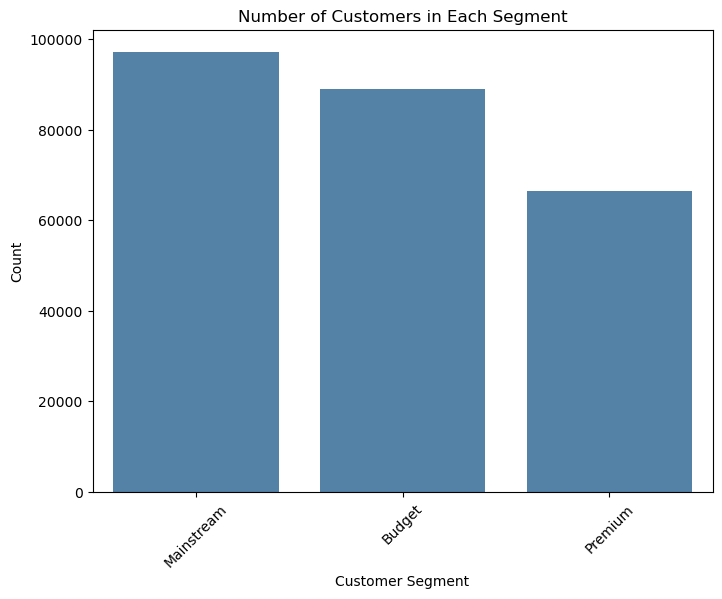

In [51]:
customer_segment_counts = merged_df['customer_category'].value_counts()
print("Customer Segment Counts:\n", customer_segment_counts)

# Bar plot for customer segment counts
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values,color='steelblue')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.title('Number of Customers in Each Segment')
plt.xticks(rotation=45);

### Observation 

The customer base can be categorized into three segments: Mainstream, Budget, and Premium. The Mainstream segment is the largest with approximately 97,200 customers, followed by Budget with 88,912 customers, and Premium with 66,476 customers. Understanding these segment counts helps us tailor marketing strategies and product offerings to meet the preferences and needs of each customer segment.

## 2. Which customer segment has the highest total sales?


sales_by_segment:
 customer_category
Budget        641975.85
Mainstream    711574.70
Premium       480488.85
Name: Total_sales, dtype: float64


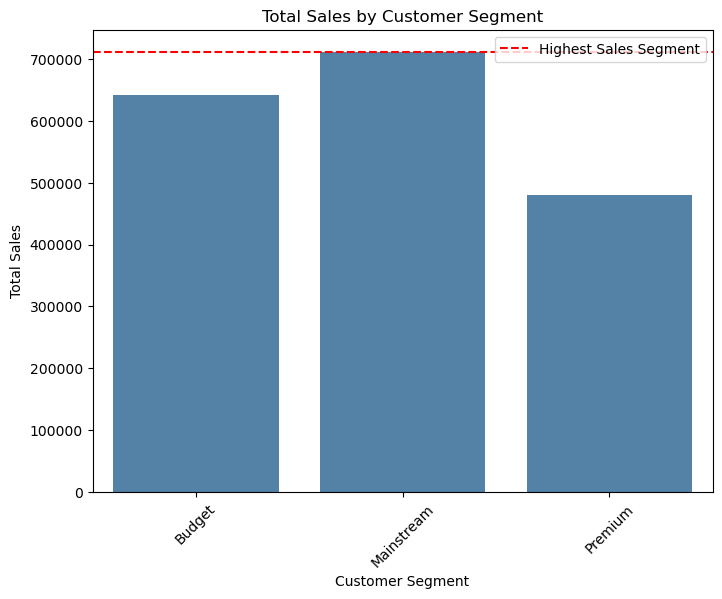

In [52]:

sales_by_segment = merged_df.groupby('customer_category')['Total_sales'].sum()
print("sales_by_segment:\n", sales_by_segment)

# Find the segment with the highest total sales
highest_sales_segment = sales_by_segment.idxmax()

# Plotting the chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values,color='steelblue')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=45)
plt.axhline(sales_by_segment[highest_sales_segment], color='red', linestyle='--', label='Highest Sales Segment')
plt.legend();

### Observation 

The Mainstream customer segment has the highest total sales, generating 711,574.70 USD. Budget follows with 641,975.85 USD in total sales, while Premium has 480,488.85 USD. This indicates the strong purchasing power of the Mainstream segment in driving overall sales.

## 3. Average transaction size for each customer segment

Average Transaction Size by Customer Segment:
 customer_category
Budget        1.909776
Premium       1.906432
Mainstream    1.901852
Name: Product_quantity, dtype: float64


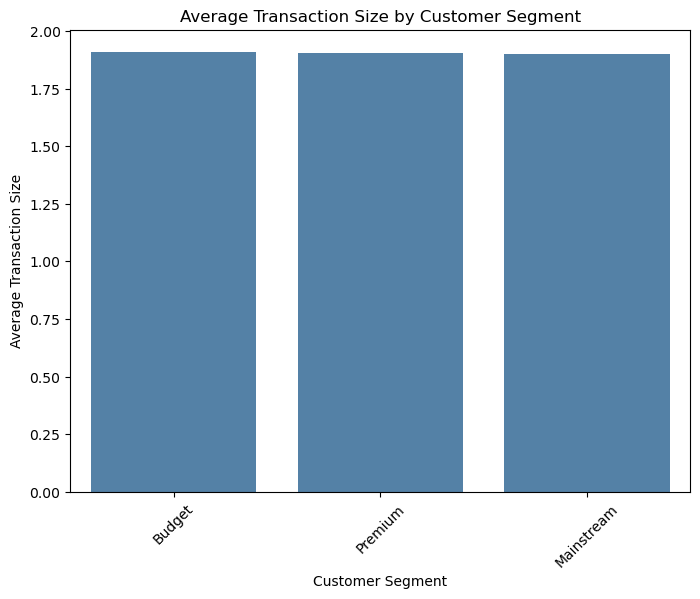

In [53]:
avg_transaction_size = merged_df.groupby('customer_category')['Product_quantity'].mean().sort_values(ascending = False)
print("Average Transaction Size by Customer Segment:\n", avg_transaction_size)

# Bar plot for average transaction size by customer segment
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_transaction_size.index, y=avg_transaction_size.values,color='steelblue')
plt.xlabel('Customer Segment')
plt.ylabel('Average Transaction Size')
plt.title('Average Transaction Size by Customer Segment')
plt.xticks(rotation=45);

### Observation 

The average transaction size is relatively similar across the customer segments. Budget customers have an average transaction size of 1.909776, followed closely by Premium customers with 1.906432. Mainstream customers have a slightly lower average transaction size of 1.901852. This suggests that customers from different segments exhibit comparable purchasing patterns in terms of transaction size.

## 4. Average total sales for each customer segment

Average Total Sales by Customer Segment:
 customer_category
Mainstream    7.320727
Premium       7.228005
Budget        7.220351
Name: Total_sales, dtype: float64


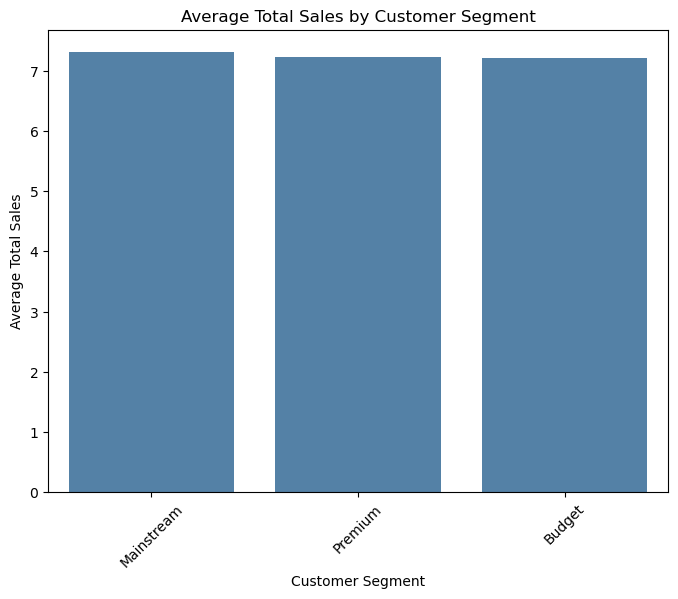

In [54]:
avg_total_sales = merged_df.groupby('customer_category')['Total_sales'].mean().sort_values(ascending = False)
print("Average Total Sales by Customer Segment:\n", avg_total_sales)

# Bar plot for average total sales by customer segment
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_total_sales.index, y=avg_total_sales.values,color='steelblue')
plt.xlabel('Customer Segment')
plt.ylabel('Average Total Sales')
plt.title('Average Total Sales by Customer Segment')
plt.xticks(rotation=45);

### Observation 

The average total sales per customer segment are relatively close to each other. Mainstream customers have an average total sales of 7.320727, followed by Premium customers with 7.228005, and Budget customers with 7.220351. This indicates that on average, customers from different segments contribute a similar amount to the total sales, suggesting comparable spending patterns across the segments.

## 5. Top 5 Most Frequently Purchased Products

Top 5 Most Frequently Purchased Products:
 Kettle Mozzarella Basil Pesto           3304
Kettle Tortilla ChpsHny Jlpno Chili     3296
Cobs Popd Swt Chlli Sr Cream Chips      3269
Tyrrells Crisps Ched Chives             3268
Cobs Popd Sea Salt Chips                3265
Name: Product_name, dtype: int64


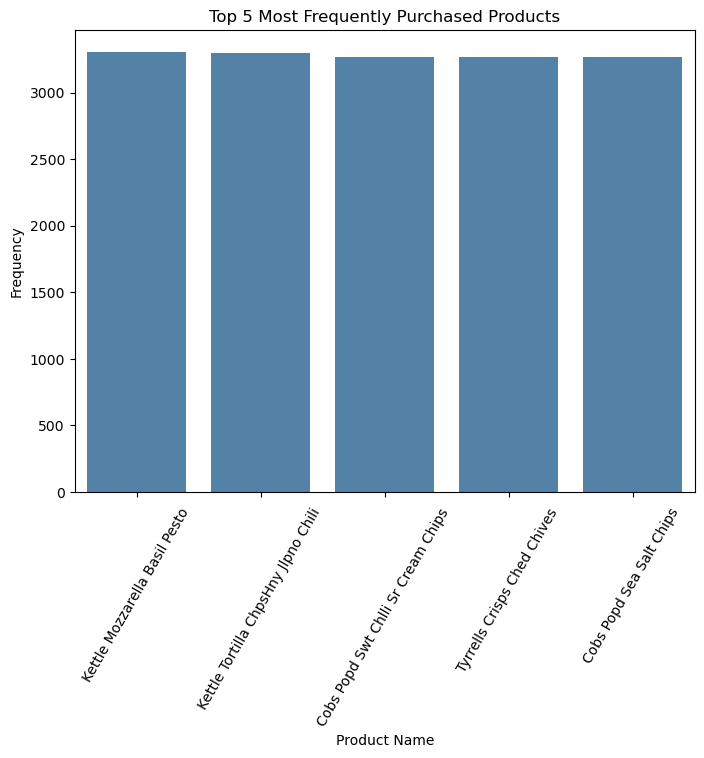

In [55]:
top_5_products = merged_df['Product_name'].value_counts().head(5)
print("Top 5 Most Frequently Purchased Products:\n", top_5_products)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_products.index, y=top_5_products.values,color='steelblue')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequently Purchased Products')
plt.xticks(rotation=60);

Top 5 Most Frequently Purchased Brands:
 Kettle           41288
Smiths           31822
Doritos          28145
Pringles         25102
Red Rock Deli    17779
Name: Product_brand, dtype: int64


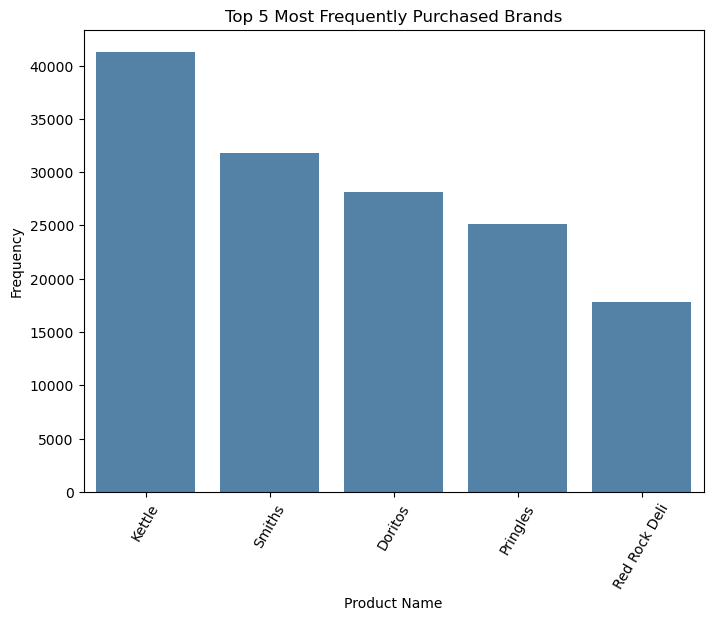

In [76]:
top_5_products = merged_df['Product_brand'].value_counts().head(5)
print("Top 5 Most Frequently Purchased Brands:\n", top_5_products)
plt.figure(figsize=(8, 6))
sns.barplot(x=top_5_products.index, y=top_5_products.values,color='steelblue')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequently Purchased Brands')
plt.xticks(rotation=60);

### Observation 

The top 5 most frequently purchased products are dominated by Kettle brand chips, which include Kettle Mozzarella Basil & Pesto (3304 purchases), Kettle Tortilla ChpsHny&Jlpno Chili (3296 purchases), Cobs Popd Swt/Chlli &Sr/Cream Chips (3269 purchases), Tyrrells Crisps Ched & Chives (3268 purchases), and Cobs Popd Sea Salt Chips (3265 purchases). These products demonstrate strong customer demand and popularity among shoppers

## 6. Average quantity of chips purchased for top 5  brands



Average Quantity of Chips Purchased by Product:
 Product_brand
Twisties    1.916437
Cobs        1.915919
Tostitos    1.914687
Kettle      1.914624
Thins       1.913250
Name: Product_quantity, dtype: float64


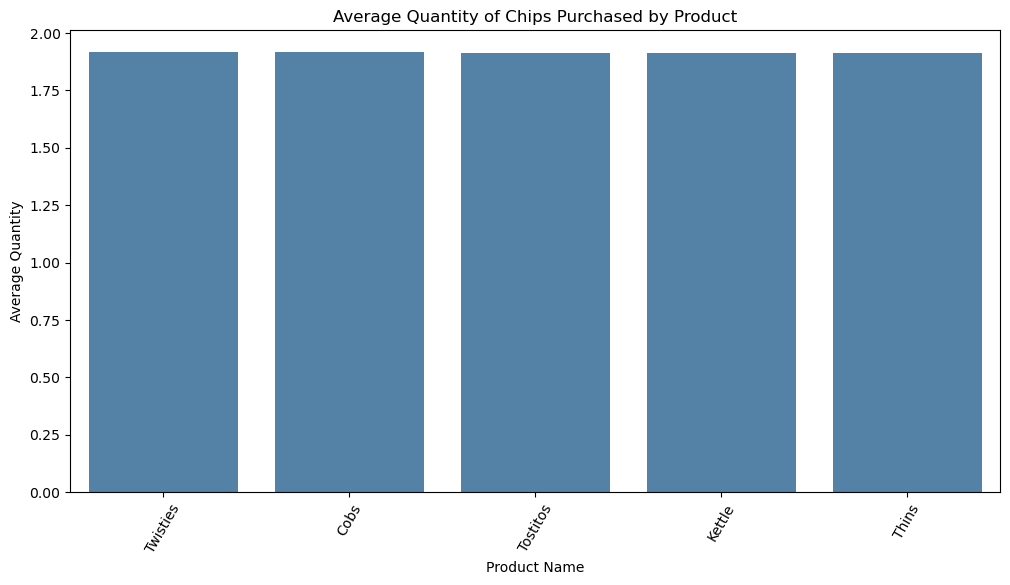

In [56]:
avg_quantity_by_product = merged_df.groupby('Product_brand')['Product_quantity'].mean().sort_values(ascending = False).head(5)
print("Average Quantity of Chips Purchased by Product:\n", avg_quantity_by_product)

# Bar plot for average quantity of chips purchased by product
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_quantity_by_product.index, y=avg_quantity_by_product.values,color='steelblue')
plt.xlabel('Product Name')
plt.ylabel('Average Quantity')
plt.title('Average Quantity of Chips Purchased by Product')
plt.xticks(rotation=60);

### Observation 

The average quantity of chips purchased per brand is consistent across the top brand. Twisties has the highest average quantity at 1.916437, followed closely by Cobs (1.915919), Tostitos (1.914687), Kettle (1.914624), and Thins (1.913250). This indicates a similar chip consumption pattern among customers for these popular brands.

## 7. Customer segments that prefer a particular chip product

<Figure size 1000x600 with 0 Axes>

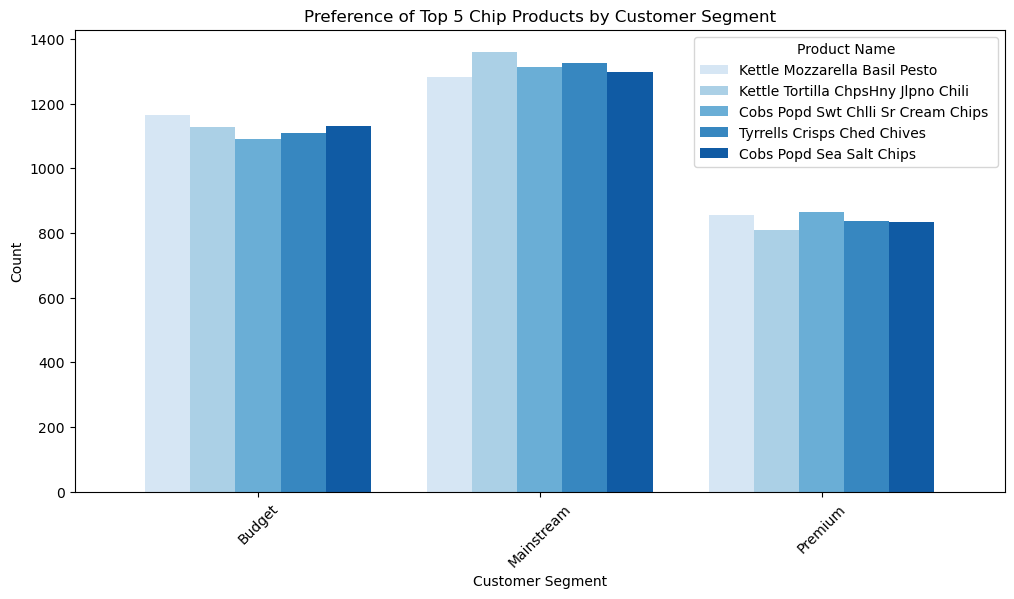

In [57]:
num_segments = 5 
# Generate a color palette with different shades of blue
colors = sns.color_palette("Blues", n_colors=num_segments)

preference_by_segment = merged_df.groupby(['customer_category', 'Product_name']).size().unstack()

# Select the top 5 products
top_5_products = preference_by_segment.sum().nlargest(5).index
preference_by_segment_top5 = preference_by_segment[top_5_products]

plt.figure(figsize=(10, 6))
preference_by_segment_top5.plot(kind='bar', figsize=(12, 6), color=colors, width=0.8)
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.title('Preference of Top 5 Chip Products by Customer Segment')
plt.xticks(rotation=45)
plt.legend(title='Product Name');

### Observation 


The preference for particular chip products varies across customer segments. Among Budget customers, the top preference is for Cobs Popd Sea Salt Chips (1132 purchases), followed closely by Kettle Mozzarella Basil & Pesto (1166 purchases). In the Mainstream segment, Kettle Tortilla ChpsHny&Jlpno Chili (1360 purchases) and Tyrrells Crisps Ched & Chives (1324 purchases) are the preferred choices. Premium customers show a more balanced preference for various chip products, with Cobs Popd Swt/Chlli &Sr/Cream Chips being the top choice (865 purchases). These findings highlight the different chip product preferences within each customer segment.

## 8. Distribution of total sales across different customer segments


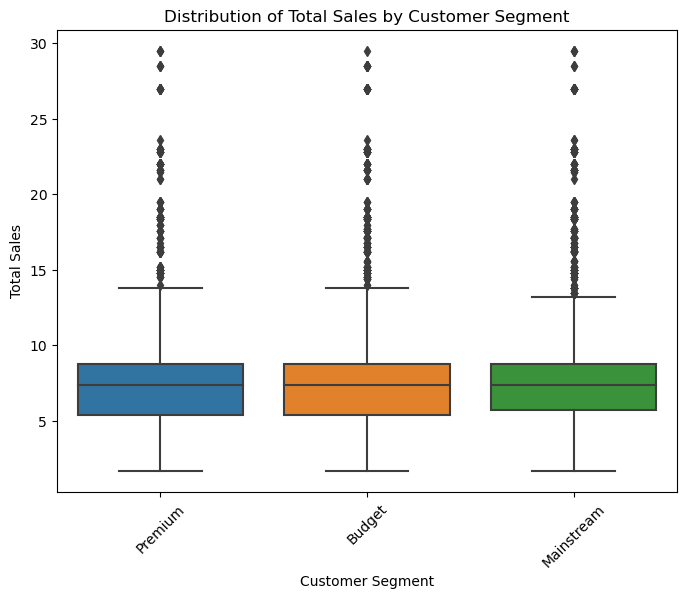

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='customer_category', y='Total_sales', data= merged_df)
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.title('Distribution of Total Sales by Customer Segment')
plt.xticks(rotation=45);

### Observation 

The  Distribution of total sales across different customer segments is consistent across board with Mainstream customers being slightly higher .This indicates that Mainstream customers contribute significantly to the overall sales revenue. Therefore, targeting and catering to the needs of Mainstream customers can be a profitable strategy for maximizing sales and revenue.

## 9. Relationship between product quantity and total sales 

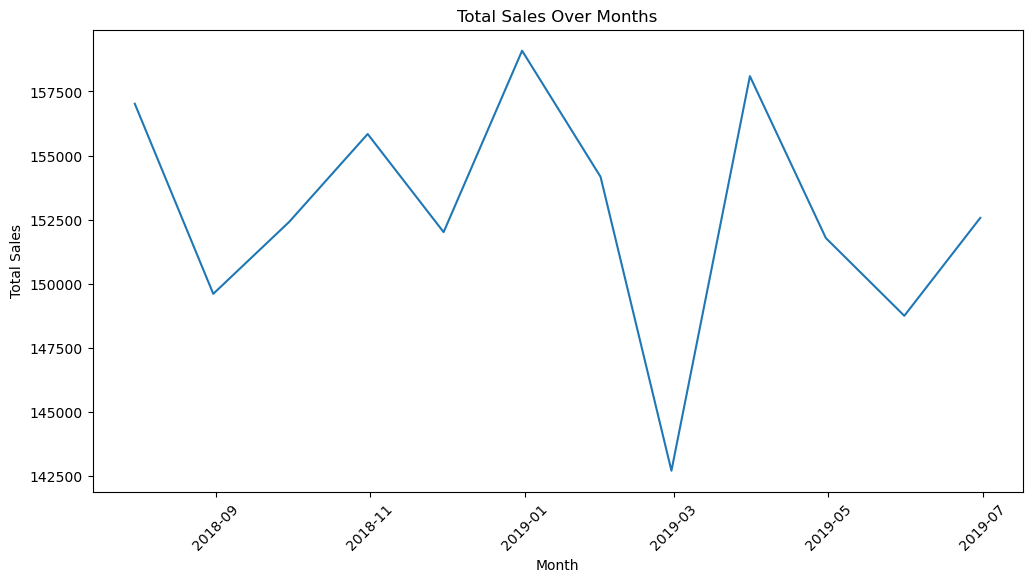

In [59]:
df_monthly = merged_df.resample('M', on='DATE').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=df_monthly.index, y='Total_sales', data=df_monthly)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Months')
plt.xticks(rotation=45);

In [70]:
df_grouped = merged_df.groupby('DATE').size().reset_index(name='Transaction_count')
df_grouped.head()

,DATE,Transaction_count
0,2018-07-01,684
1,2018-07-02,667
2,2018-07-03,691
3,2018-07-04,685
4,2018-07-05,667


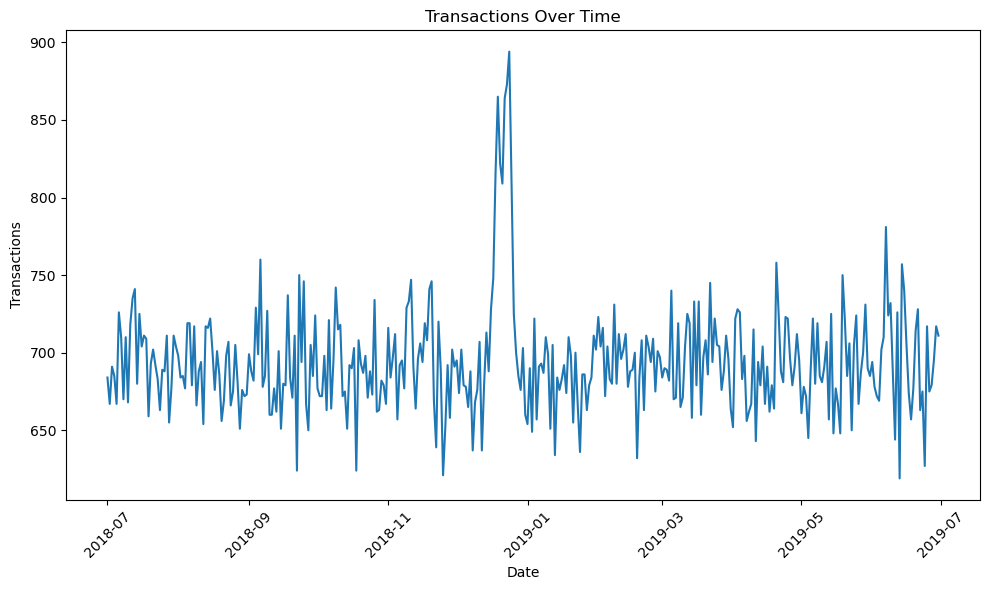

In [71]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=df_grouped, x='DATE', y='Transaction_count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transactions')

# Show plot
plt.tight_layout()
plt.show()

In [73]:
start_date = '2018-11-01'
end_date = '2019-01-31'
df_filtered = df_grouped[(df_grouped['DATE'] >= start_date) & (df_grouped['DATE'] <= end_date)]
df_filtered

,DATE,Transaction_count
123,2018-11-01,716
124,2018-11-02,684
125,2018-11-03,697
126,2018-11-04,712
127,2018-11-05,657
...,...,...
209,2019-01-27,663
210,2019-01-28,679
211,2019-01-29,684
212,2019-01-30,711


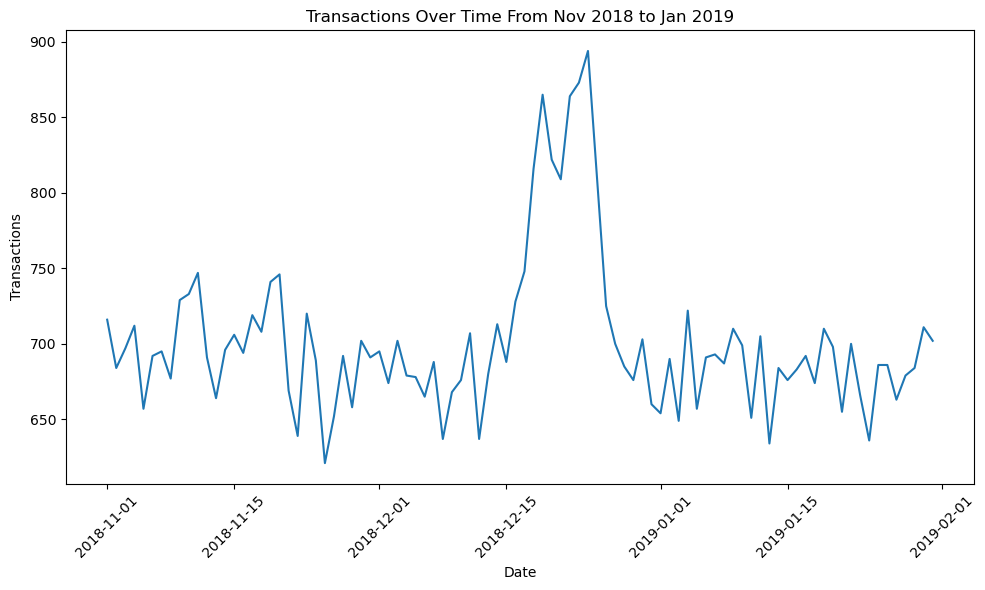

In [75]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the line plot
sns.lineplot(data=df_filtered, x='DATE', y='Transaction_count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Transactions Over Time From Nov 2018 to Jan 2019')
plt.xlabel('Date')
plt.ylabel('Transactions')

# Show plot
plt.tight_layout()
plt.show()

### Observation 

The total sales vary over the months in the dataset. The sales are highest in December  and lowest in February . There seems to be a seasonal trend where sales are generally higher in the second half of the year compared to the first half. Overall, it appears that the store has experienced growth in sales over the months, with a few minor dips in between.

## 10.  Total sales by life stage and customer category

Let's start with calculating total sales by Life_stage and customer_categoryand plotting the split by these segments to describe which customer segment contribute most to chip sales.

In [62]:
total_life_customer= pd.DataFrame(merged_df.groupby(["life_stage","customer_category"])["Total_sales"].sum())
total_life_customer

Total_sales
life_stage             customer_category             
Midage Singles/Couples Budget                33968.00
                       Mainstream            85665.75
                       Premium               55533.75
New Families           Budget                20838.25
                       Mainstream            16158.60
                       Premium               10924.10
Older Families         Budget               159989.35
                       Mainstream            98240.25
                       Premium               76703.20
Older Singles/Couples  Budget               129671.80
                       Mainstream           126803.10
                       Premium              125312.45
Retirees               Budget               107313.40
                       Mainstream           147444.15
                       Premium               92440.75
Young Families         Budget               132055.25
                       Mainstream            88145.65
                       Premium               79878.30
Young Singles/Couples  Budget                58139.80
                       Mainstream           149117.20
                       Premium               39696.30

/var/folders/fl/pc69thlj5m72n1w073prjtdh0000gn/T/ipykernel_55851/2274228272.py:26: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["life_stage"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")


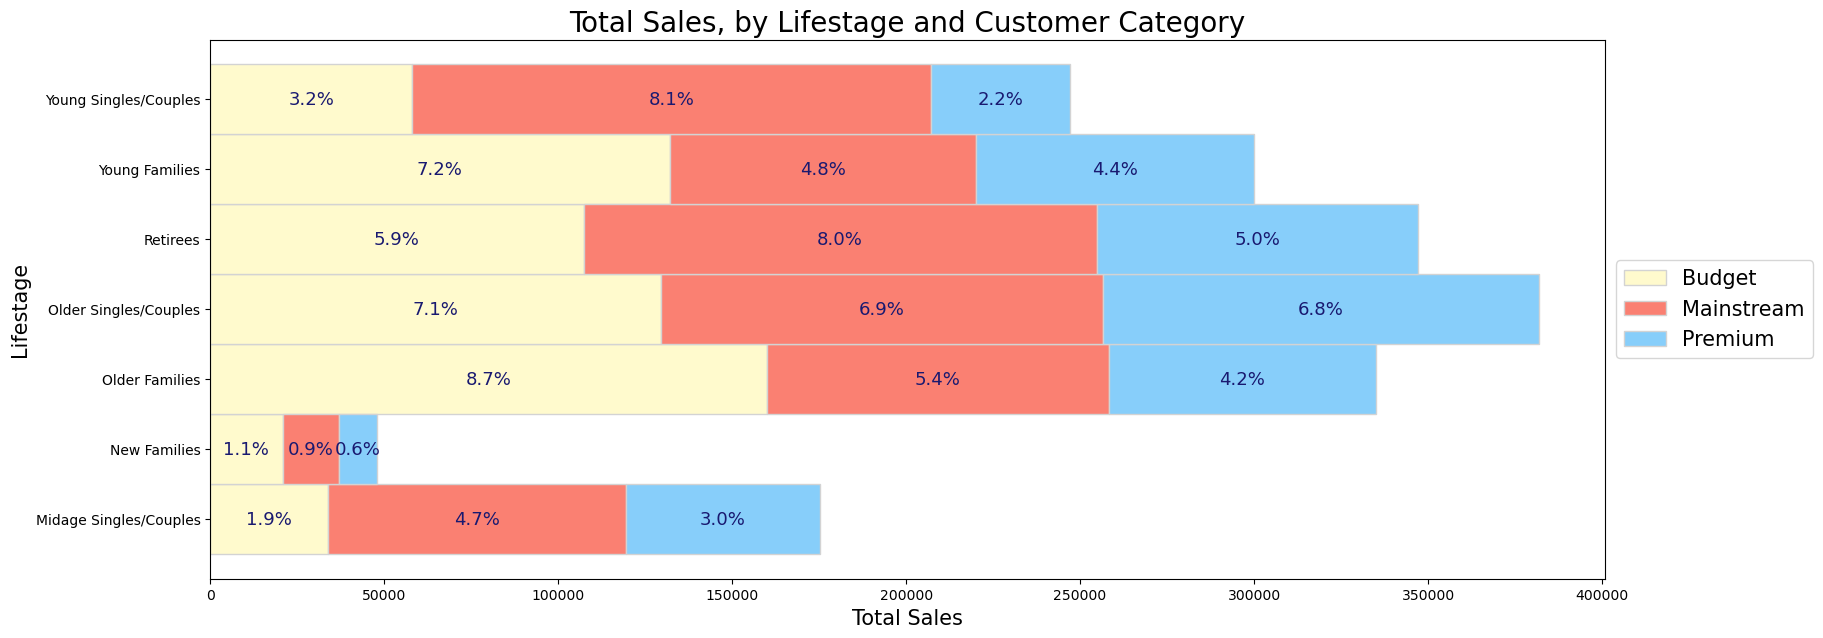

In [63]:
# Plot to show total sales in each customer segement
# from https://github.com/kevwij/insidesherpa_quantium_virtual-experience/blob/master/Quantium%20-%20Module%201.ipynb
# Values of each group
bars1 = total_life_customer[total_life_customer.index.get_level_values("customer_category") == "Budget"]["Total_sales"]
bars2 = total_life_customer[total_life_customer.index.get_level_values("customer_category") == "Mainstream"]["Total_sales"]
bars3 = total_life_customer[total_life_customer.index.get_level_values("customer_category") == "Premium"]["Total_sales"]
 
bars1_text = (bars1 / sum(total_life_customer["Total_sales"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(total_life_customer["Total_sales"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(total_life_customer["Total_sales"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = total_life_customer.index.get_level_values("life_stage").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["life_stage"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Total Sales",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Total Sales, by Lifestage and Customer Category",fontsize=20)

# Show graphic
plt.show()

### Observation 

Based on the chart observation, the majority of sales originate from the following customer categories:

- Budget - Older Families
- Mainstream - Young Singles/Couples
- Mainstream - Retirees

In [64]:
count_life_customer = pd.DataFrame(customer.groupby(["life_stage","customer_category"]).count())
count_life_customer.columns=["no_transactions"]
count_life_customer

no_transactions
life_stage             customer_category                 
Midage Singles/Couples Budget                        1504
                       Mainstream                    3340
                       Premium                       2431
New Families           Budget                        1112
                       Mainstream                     849
                       Premium                        588
Older Families         Budget                        4675
                       Mainstream                    2831
                       Premium                       2274
Older Singles/Couples  Budget                        4929
                       Mainstream                    4930
                       Premium                       4750
Retirees               Budget                        4454
                       Mainstream                    6479
                       Premium                       3872
Young Families         Budget                        4017
                       Mainstream                    2728
                       Premium                       2433
Young Singles/Couples  Budget                        3779
                       Mainstream                    8088
                       Premium                       2574

/var/folders/fl/pc69thlj5m72n1w073prjtdh0000gn/T/ipykernel_55851/2360952383.py:26: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["life_stage"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")


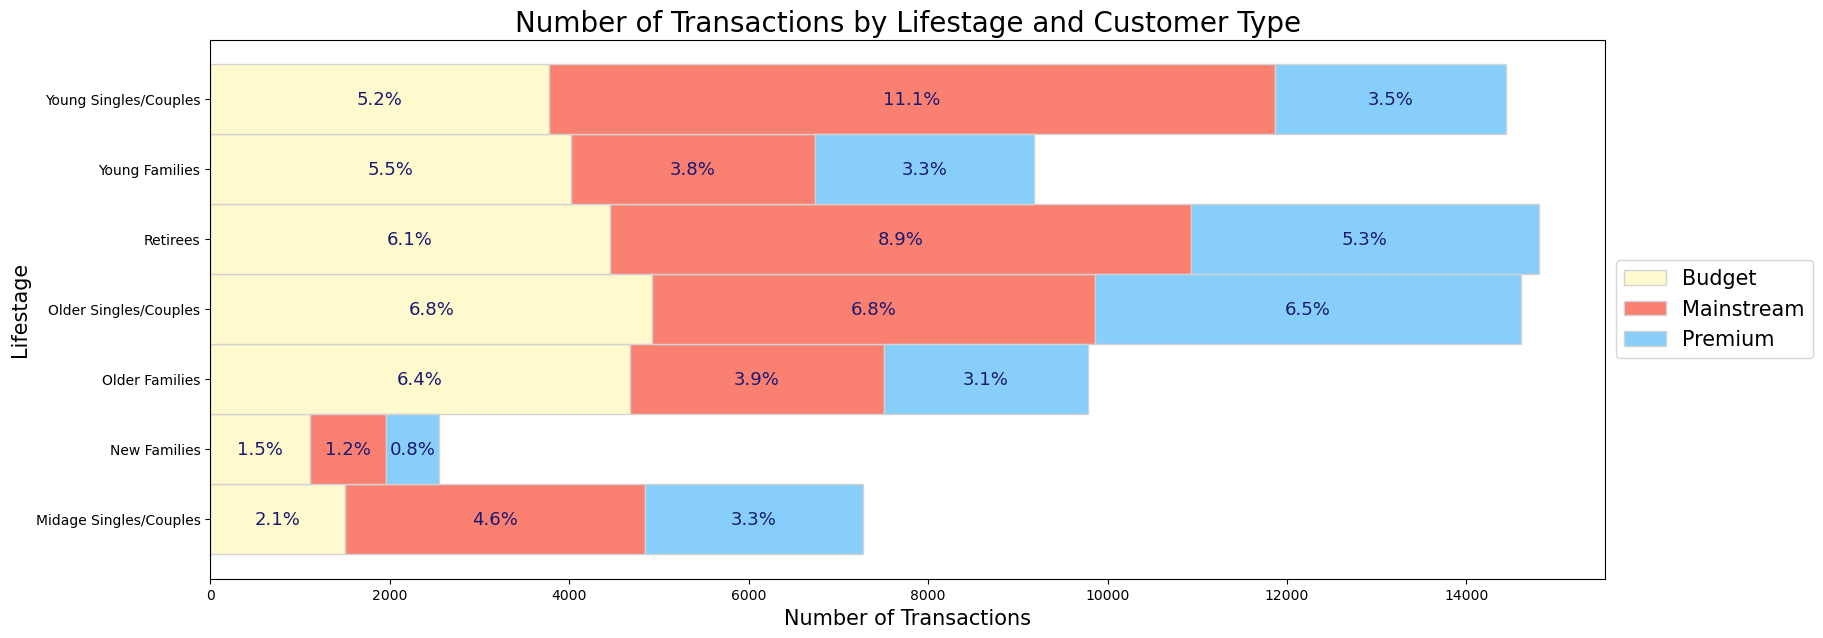

In [65]:
# Plot to show total sales in each customer segement
# from https://github.com/kevwij/insidesherpa_quantium_virtual-experience/blob/master/Quantium%20-%20Module%201.ipynb
# Values of each group
bars1 = count_life_customer[count_life_customer.index.get_level_values("customer_category") == "Budget"]["no_transactions"]
bars2 = count_life_customer[count_life_customer.index.get_level_values("customer_category") == "Mainstream"]["no_transactions"]
bars3 = count_life_customer[count_life_customer.index.get_level_values("customer_category") == "Premium"]["no_transactions"]
 
bars1_text = (bars1 / sum(count_life_customer["no_transactions"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(count_life_customer["no_transactions"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(count_life_customer["no_transactions"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = count_life_customer.index.get_level_values("life_stage").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["life_stage"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Number of Transactions",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Number of Transactions by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()

### Observation 

The data analysis indicates a notable trend where Mainstream - young singles/couples and Mainstream - retirees exhibit a higher propensity for purchasing chips compared to other segments. Consequently, these segments contribute significantly to overall sales. However, it's worth noting that this trend is less pronounced within the Budget - Older Families segment, suggesting that other factors may be driving their purchasing behavior.

## 11. Average Sales Quantity
Higher sales may also be driven by more units of chips being bought per customer. Let's have a look at this next

In [66]:
# Calculate the average number of units per customer by those two dimensions
merge_life_customer = pd.merge(total_life_customer,count_life_customer,on=["life_stage","customer_category"])
merge_life_customer['sales_quantity'] = merged_df.groupby(["life_stage","customer_category"])["Product_quantity"].sum()
merge_life_customer['avg_sales_quantity'] = (merge_life_customer["sales_quantity"]/merge_life_customer["no_transactions"])
merge_life_customer

Total_sales  no_transactions  \
life_stage             customer_category                                 
Midage Singles/Couples Budget                33968.00             1504   
                       Mainstream            85665.75             3340   
                       Premium               55533.75             2431   
New Families           Budget                20838.25             1112   
                       Mainstream            16158.60              849   
                       Premium               10924.10              588   
Older Families         Budget               159989.35             4675   
                       Mainstream            98240.25             2831   
                       Premium               76703.20             2274   
Older Singles/Couples  Budget               129671.80             4929   
                       Mainstream           126803.10             4930   
                       Premium              125312.45             4750   
Retirees               Budget               107313.40             4454   
                       Mainstream           147444.15             6479   
                       Premium               92440.75             3872   
Young Families         Budget               132055.25             4017   
                       Mainstream            88145.65             2728   
                       Premium               79878.30             2433   
Young Singles/Couples  Budget                58139.80             3779   
                       Mainstream           149117.20             8088   
                       Premium               39696.30             2574   

                                          sales_quantity  avg_sales_quantity  
life_stage             customer_category                                      
Midage Singles/Couples Budget                       9120            6.063830  
                       Mainstream                  21568            6.457485  
                       Premium                     14815            6.094200  
New Families           Budget                       5329            4.792266  
                       Mainstream                   4128            4.862191  
                       Premium                      2831            4.814626  
Older Families         Budget                      43044            9.207273  
                       Mainstream                  26501            9.361003  
                       Premium                     20795            9.144679  
Older Singles/Couples  Budget                      33584            6.813552  
                       Mainstream                  33428            6.780527  
                       Premium                     32371            6.814947  
Retirees               Budget                      27464            6.166143  
                       Mainstream                  38543            5.948912  
                       Premium                     23701            6.121126  
Young Families         Budget                      35373            8.805825  
                       Mainstream                  23883            8.754765  
                       Premium                     21398            8.794903  
Young Singles/Couples  Budget                      15888            4.204287  
                       Mainstream                  36809            4.551063  
                       Premium                     10821            4.203963

Text(0, 0.5, 'Average Sales Quantity')

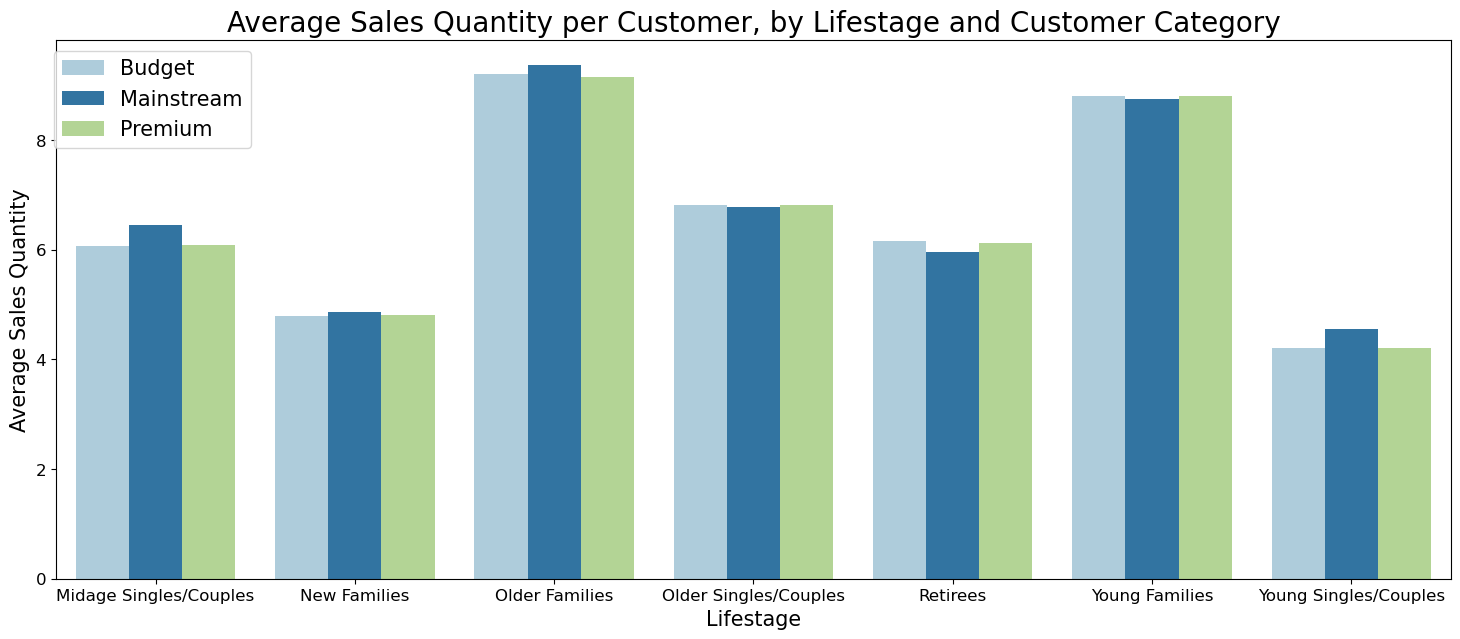

In [67]:
# Plot the average number of units per customer by those two dimensions
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=merge_life_customer.reset_index()["life_stage"], y=merge_life_customer.reset_index()["avg_sales_quantity"], 
            hue=merge_life_customer.reset_index()["customer_category"], 
            palette=sns.color_palette("Paired", 3))
plt.title("Average Sales Quantity per Customer, by Lifestage and Customer Category",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(0.14,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average Sales Quantity",fontsize=15)

### Observation 

The analysis reveals that both Older Families and Young Families tend to purchase a higher quantity of chips per customer compared to other demographic segments. This suggests that these family-oriented groups demonstrate a propensity for consuming chips at a higher rate on a per-customer basis.

## 12. Average sales price
Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [68]:
merge_life_customer['avg_sales_price'] = (merge_life_customer["Total_sales"]/merge_life_customer["sales_quantity"])
merge_life_customer

Total_sales  no_transactions  \
life_stage             customer_category                                 
Midage Singles/Couples Budget                33968.00             1504   
                       Mainstream            85665.75             3340   
                       Premium               55533.75             2431   
New Families           Budget                20838.25             1112   
                       Mainstream            16158.60              849   
                       Premium               10924.10              588   
Older Families         Budget               159989.35             4675   
                       Mainstream            98240.25             2831   
                       Premium               76703.20             2274   
Older Singles/Couples  Budget               129671.80             4929   
                       Mainstream           126803.10             4930   
                       Premium              125312.45             4750   
Retirees               Budget               107313.40             4454   
                       Mainstream           147444.15             6479   
                       Premium               92440.75             3872   
Young Families         Budget               132055.25             4017   
                       Mainstream            88145.65             2728   
                       Premium               79878.30             2433   
Young Singles/Couples  Budget                58139.80             3779   
                       Mainstream           149117.20             8088   
                       Premium               39696.30             2574   

                                          sales_quantity  avg_sales_quantity  \
life_stage             customer_category                                       
Midage Singles/Couples Budget                       9120            6.063830   
                       Mainstream                  21568            6.457485   
                       Premium                     14815            6.094200   
New Families           Budget                       5329            4.792266   
                       Mainstream                   4128            4.862191   
                       Premium                      2831            4.814626   
Older Families         Budget                      43044            9.207273   
                       Mainstream                  26501            9.361003   
                       Premium                     20795            9.144679   
Older Singles/Couples  Budget                      33584            6.813552   
                       Mainstream                  33428            6.780527   
                       Premium                     32371            6.814947   
Retirees               Budget                      27464            6.166143   
                       Mainstream                  38543            5.948912   
                       Premium                     23701            6.121126   
Young Families         Budget                      35373            8.805825   
                       Mainstream                  23883            8.754765   
                       Premium                     21398            8.794903   
Young Singles/Couples  Budget                      15888            4.204287   
                       Mainstream                  36809            4.551063   
                       Premium                     10821            4.203963   

                                          avg_sales_price  
life_stage             customer_category                   
Midage Singles/Couples Budget                    3.724561  
                       Mainstream                3.971891  
                       Premium                   3.748481  
New Families           Budget                    3.910349  
                       Mainstream                3.914390  
                       Premium                   3.858742  
Older Families    

Text(0, 0.5, 'Average Sales Price')

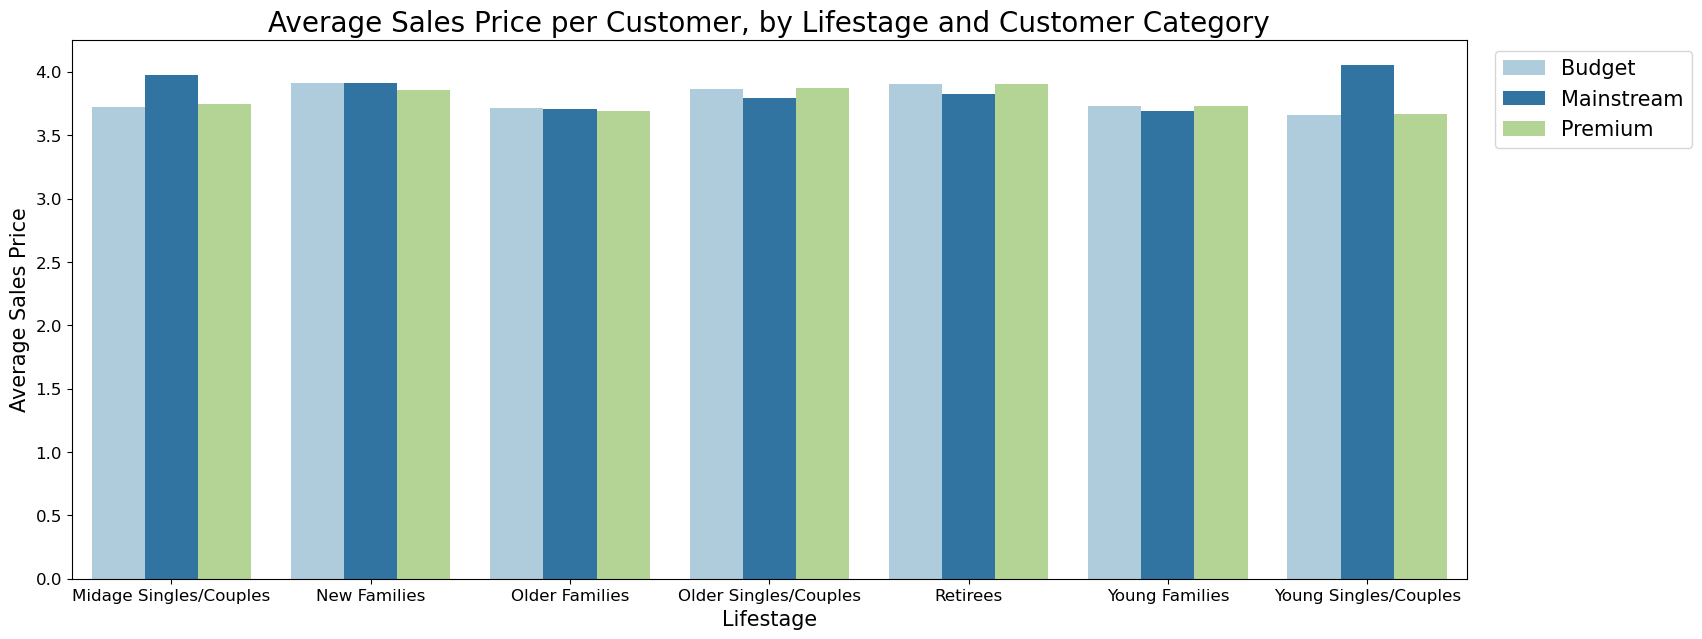

In [69]:
# Plot the average number of units per customer by those two dimensions
plt.figure(figsize=(18,7))
plt.tick_params(labelsize=12)
sns.barplot(x=merge_life_customer.reset_index()["life_stage"], y=merge_life_customer.reset_index()["avg_sales_price"], 
            hue=merge_life_customer.reset_index()["customer_category"], 
            palette=sns.color_palette("Paired", 3))
plt.title("Average Sales Price per Customer, by Lifestage and Customer Category",fontsize=20)
plt.legend(fontsize=15, bbox_to_anchor=(1.02,0.98),borderaxespad = 0.)
plt.xlabel("Lifestage",fontsize=15)
plt.ylabel("Average Sales Price",fontsize=15)

### Observation 

The data analysis indicates that Mainstream mid-age and young singles/couples are generally more inclined to pay a higher price per packet of chips compared to their counterparts in the budget and premium segments. This discrepancy could be attributed to premium shoppers' tendency to prioritize healthier snack options. When premium shoppers do opt for chips, it may primarily be for recreational purposes rather than personal consumption. Furthermore, the observation aligns with the lower frequency of chip purchases among premium mid-age and young singles/couples compared to their counterparts in the mainstream segment.








## Conculsion

Based on the analysis conducted on the customer segments and chip purchasing behavior, the following conclusions can be drawn:

1. Customer Segments: The dataset consists of three customer segments, namely Budget, Mainstream, and Premium. Mainstream is the largest segment with the highest number of customers, followed by Budget and Premium segments.

2. Total Sales: Mainstream customers have the highest total sales, indicating their significant contribution to overall revenue. Budget and Premium segments also contribute substantially but to a slightly lesser extent.

3. Average Transaction Size: The average transaction size is consistent across customer segments, with no significant variation observed. This suggests that customers from different segments tend to make similar-sized purchases on average.

4. Top Purchased Products: The top 5 most frequently purchased products include Kettle Mozzarella Basil & Pesto, Kettle Tortilla ChpsHny&Jlpno Chili, Cobs Popd Swt/Chlli &Sr/Cream Chips, Tyrrells Crisps Ched & Chives, and Cobs Popd Sea Salt Chips. These products are popular among customers from all segments.

5. Average Quantity of brands Purchased: The average quantity of chips purchased for different products is relatively consistent, indicating that customers tend to buy similar quantities irrespective of the product or customer segment.

6. Preference by Customer Segment: There are variations in product preferences among customer segments. Mainstream customers show a higher preference for certain chip products compared to Budget and Premium segments.

7. Monthly Sales Variation: The analysis reveals a noticeable seasonality trend, particularly in December. Total transactions exhibit fluctuations across months throughout the year. However, December stands out with a significant increase in transaction volume, suggesting a seasonal pattern associated with holiday shopping or year-end sales events.

8. Top Sales Segments: The majority of chip sales come from three main customer groups: Budget - Older Families, Mainstream - Young Singles/Couples, and Mainstream - Retirees.

9. Sales Trends: Mainstream - Young Singles/Couples and Mainstream - Retirees are the primary contributors to chip sales. However, the Budget - Older Families segment shows a different pattern, suggesting they might have unique preferences or habits.

10. Chip Consumption Habits: Families, both older and younger, tend to buy more chips per customer compared to other groups. This indicates a higher affinity for chips within family-oriented demographics.

11. Price Sensitivity: Mainstream mid-age and young singles/couples are willing to pay more per packet of chips compared to budget and premium shoppers. This could be due to their preferences for indulgence or entertainment.

In conclusion, understanding customer segments and their chip purchasing behavior is crucial for targeted marketing strategies. Mainstream customers, being the largest segment with higher total sales, should be a primary focus for maximizing revenue. Additionally, the popularity of specific chip products among different segments provides an opportunity for product positioning and targeted promotions. Continuous monitoring of sales trends and customer preferences is recommended for effective marketing and business growth.







## Recommendations



1. Tailored Marketing: Craft marketing campaigns that resonate with each customer segment's preferences. Highlight chip products favored by specific segments to boost sales.

2. Smart Pricing: Adjust pricing strategies to match each segment's willingness to pay. Consider premium offerings or special deals for segments willing to pay more.

3. Product Innovation: Introduce new chip flavors or variations that cater to different segment preferences. Healthy options might appeal to premium shoppers, while adventurous flavors could attract mainstream customers.

4. Engage Customers: Implement loyalty programs or personalized incentives to encourage repeat purchases. Building a connection with customers can foster loyalty and increase sales.

5. Explore New Markets: Look for opportunities to expand into new markets or channels based on segment preferences. Partnerships with retailers or online platforms could help reach a wider audience.

By applying these recommendations, we can better cater to the diverse preferences of our customer segments, drive sales growth, and strengthen our position in the market